# LOGISTIC REGRESSION

### Task 1. Data Exploration:

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
train_df = pd.read_csv('Titanic_train.csv')
test_df = pd.read_csv('Titanic_test.csv')

# Display the first few rows of the dataset
print(train_df.head())

# Summary statistics
print(train_df.describe())

# Data types and missing values
print(train_df.info())




   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

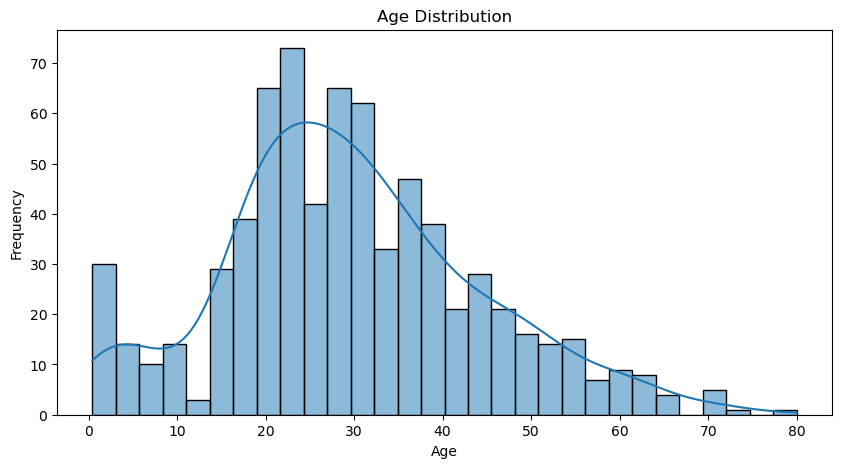

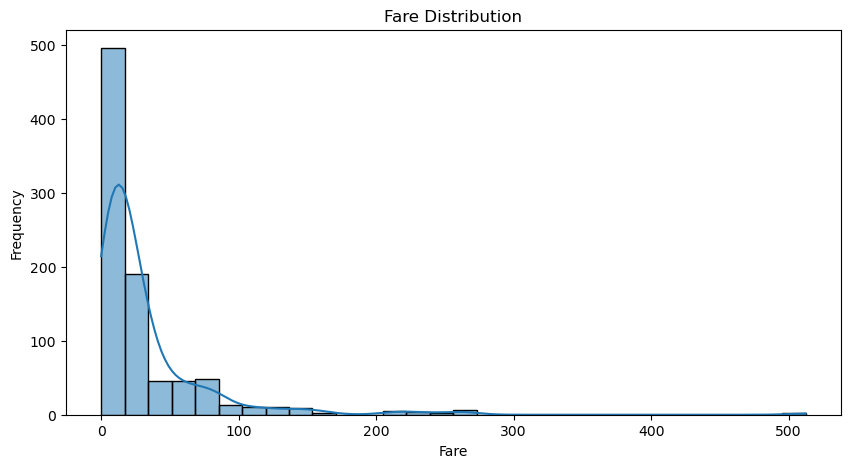

In [27]:
# Histograms
plt.figure(figsize=(10, 5))
sns.histplot(train_df['Age'].dropna(), kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(train_df['Fare'], kde=True, bins=30)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()



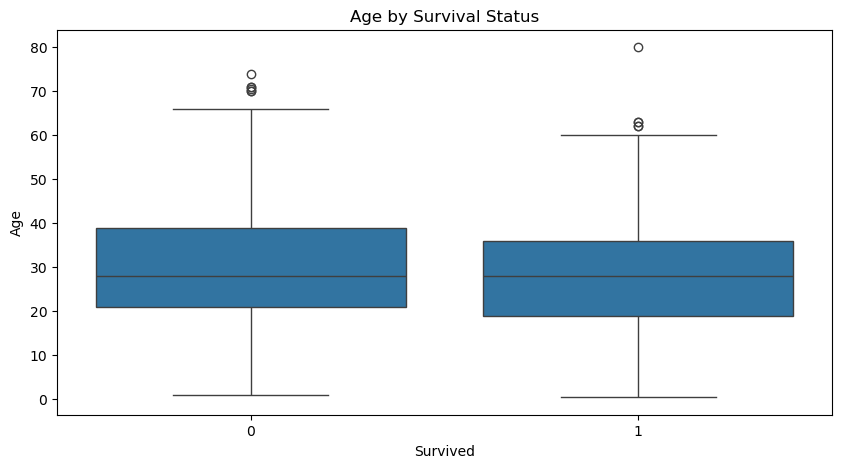

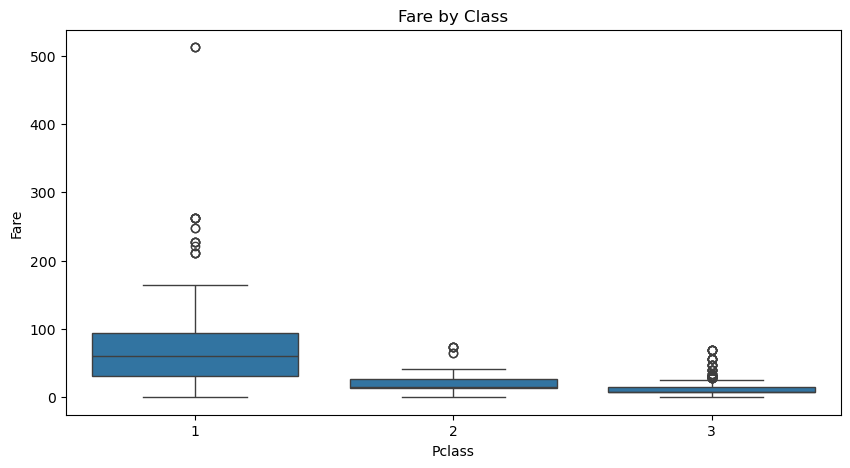

In [29]:
# Box plots
plt.figure(figsize=(10, 5))
sns.boxplot(x='Survived', y='Age', data=train_df)
plt.title('Age by Survival Status')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x='Pclass', y='Fare', data=train_df)
plt.title('Fare by Class')
plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.show()



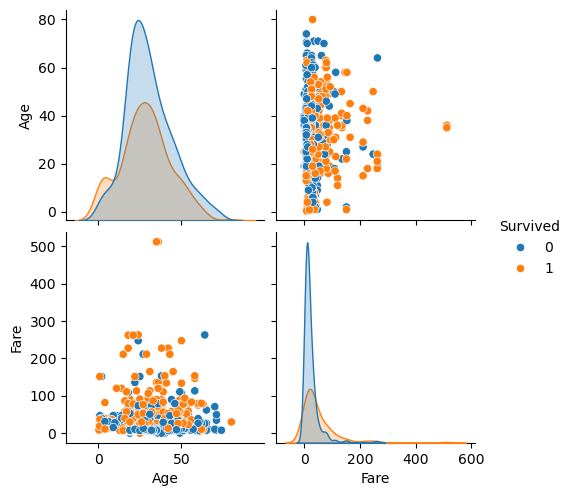

In [31]:
# Pair plots
numerical_features = ['Age', 'Fare', 'Survived']
sns.pairplot(train_df[numerical_features].dropna(), hue='Survived', diag_kind='kde')
plt.show()



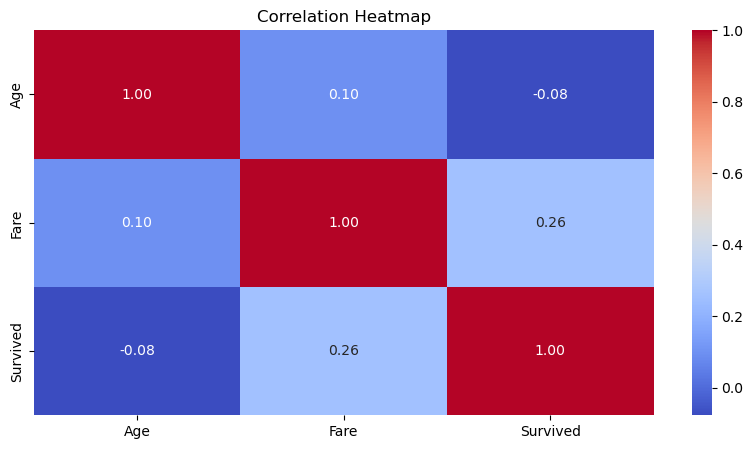

In [32]:
# Correlation heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(train_df[numerical_features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

### Task 2. Data Preprocessing:

In [43]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer

# Load the dataset
train_df = pd.read_csv('Titanic_train.csv')
test_df = pd.read_csv('Titanic_test.csv')

# Combine train and test datasets for consistent preprocessing
combined_df = pd.concat([train_df, test_df], sort=False)

# Identify missing values
print("Missing values before imputation:")
print(combined_df.isnull().sum())

# Handle missing values
# Impute missing 'Age' with the median
age_imputer = SimpleImputer(strategy='median')
combined_df['Age'] = age_imputer.fit_transform(combined_df[['Age']])

# Impute missing 'Fare' with the median
fare_imputer = SimpleImputer(strategy='median')
combined_df['Fare'] = fare_imputer.fit_transform(combined_df[['Fare']])

# Impute missing 'Embarked' with the mode
embarked_imputer = SimpleImputer(strategy='most_frequent')
combined_df['Embarked'] = embarked_imputer.fit_transform(combined_df[['Embarked']]).ravel()

# Impute missing 'Cabin' with a placeholder
combined_df['Cabin'] = combined_df['Cabin'].fillna('Unknown')

# Encode categorical variables
# Label Encoding for 'Sex'
label_encoder = LabelEncoder()
combined_df['Sex'] = label_encoder.fit_transform(combined_df['Sex'])

# One-Hot Encoding for 'Embarked' and 'Pclass'
combined_df = pd.get_dummies(combined_df, columns=['Embarked', 'Pclass'], drop_first=True)

# Split the combined dataset back into train and test sets
train_df = combined_df[:len(train_df)]
test_df = combined_df[len(train_df):]

# Display the first few rows of the preprocessed dataset
print("First few rows of the preprocessed training dataset:")
print(train_df.head())
print("First few rows of the preprocessed test dataset:")
print(test_df.head())

# Verify missing values after imputation
print("Missing values after imputation:")
print(train_df.isnull().sum())
print(test_df.isnull().sum())


Missing values before imputation:
PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64
First few rows of the preprocessed training dataset:
   PassengerId  Survived                                               Name  \
0            1       0.0                            Braund, Mr. Owen Harris   
1            2       1.0  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       1.0                             Heikkinen, Miss. Laina   
3            4       1.0       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5       0.0                           Allen, Mr. William Henry   

   Sex   Age  SibSp  Parch            Ticket     Fare    Cabin  Embarked_Q  \
0    1  22.0      1      0         A/5 21171   7.2500  Unknown       False   
1    0  38.0      1      0   

### Task 3. Model Building:

In [55]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
train_df = pd.read_csv('Titanic_train.csv')
test_df = pd.read_csv('Titanic_test.csv')

# Combine train and test datasets for consistent preprocessing
combined_df = pd.concat([train_df, test_df], sort=False)

# Identify missing values
print("Missing values before imputation:")
print(combined_df.isnull().sum())

# Handle missing values
# Impute missing 'Age' with the median
age_imputer = SimpleImputer(strategy='median')
combined_df['Age'] = age_imputer.fit_transform(combined_df[['Age']])

# Impute missing 'Fare' with the median
fare_imputer = SimpleImputer(strategy='median')
combined_df['Fare'] = fare_imputer.fit_transform(combined_df[['Fare']])

# Impute missing 'Embarked' with the mode
embarked_imputer = SimpleImputer(strategy='most_frequent')
combined_df['Embarked'] = embarked_imputer.fit_transform(combined_df[['Embarked']]).ravel()

# Impute missing 'Cabin' with a placeholder
combined_df['Cabin'] = combined_df['Cabin'].fillna('Unknown')

# Encode categorical variables
# Label Encoding for 'Sex'
label_encoder = LabelEncoder()
combined_df['Sex'] = label_encoder.fit_transform(combined_df['Sex'])

# One-Hot Encoding for 'Embarked' and 'Pclass'
combined_df = pd.get_dummies(combined_df, columns=['Embarked', 'Pclass'], drop_first=True)

# Split the combined dataset back into train and test sets
train_df = combined_df[:len(train_df)]
test_df = combined_df[len(train_df):]

# Define the features and target variable
X = train_df.drop(columns=['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'])
y = train_df['Survived']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the logistic regression model
logreg = LogisticRegression(max_iter=1000)

# Train the model
logreg.fit(X_train, y_train)

# Predict on the validation set
y_pred = logreg.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
conf_matrix = confusion_matrix(y_val, y_pred)
class_report = classification_report(y_val, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


Missing values before imputation:
PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64
Accuracy: 0.7988826815642458
Confusion Matrix:
[[90 15]
 [21 53]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.86      0.83       105
         1.0       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



### Task 4. Model Evaluation:

Missing values before imputation:
PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64
Accuracy: 0.7988826815642458
Precision: 0.7794117647058824
Recall: 0.7162162162162162
F1-score: 0.7464788732394366
ROC-AUC score: 0.8754182754182755
Confusion Matrix:
[[90 15]
 [21 53]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.86      0.83       105
         1.0       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



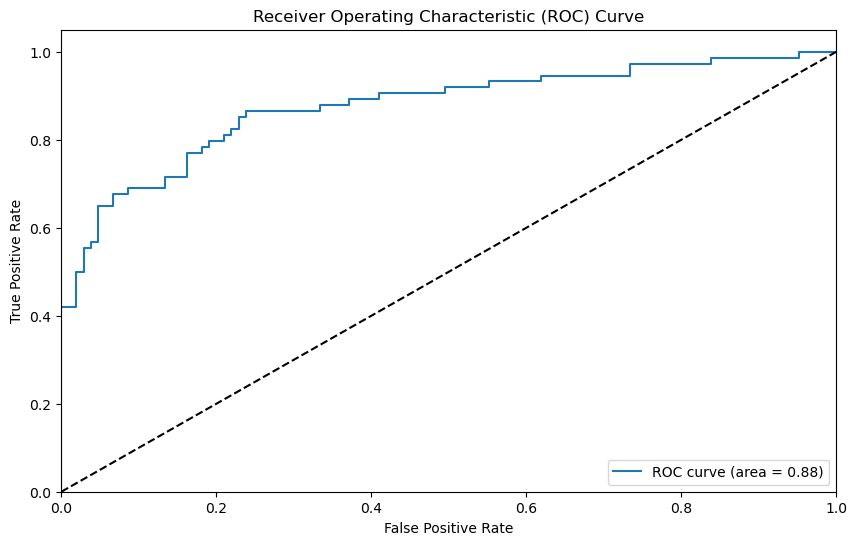

In [59]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Load the dataset
train_df = pd.read_csv('Titanic_train.csv')
test_df = pd.read_csv('Titanic_test.csv')

# Combine train and test datasets for consistent preprocessing
combined_df = pd.concat([train_df, test_df], sort=False)

# Identify missing values
print("Missing values before imputation:")
print(combined_df.isnull().sum())

# Handle missing values
# Impute missing 'Age' with the median
age_imputer = SimpleImputer(strategy='median')
combined_df['Age'] = age_imputer.fit_transform(combined_df[['Age']])

# Impute missing 'Fare' with the median
fare_imputer = SimpleImputer(strategy='median')
combined_df['Fare'] = fare_imputer.fit_transform(combined_df[['Fare']])

# Impute missing 'Embarked' with the mode
embarked_imputer = SimpleImputer(strategy='most_frequent')
combined_df['Embarked'] = embarked_imputer.fit_transform(combined_df[['Embarked']]).ravel()

# Impute missing 'Cabin' with a placeholder
combined_df['Cabin'] = combined_df['Cabin'].fillna('Unknown')

# Encode categorical variables
# Label Encoding for 'Sex'
label_encoder = LabelEncoder()
combined_df['Sex'] = label_encoder.fit_transform(combined_df['Sex'])

# One-Hot Encoding for 'Embarked' and 'Pclass'
combined_df = pd.get_dummies(combined_df, columns=['Embarked', 'Pclass'], drop_first=True)

# Split the combined dataset back into train and test sets
train_df = combined_df[:len(train_df)]
test_df = combined_df[len(train_df):]

# Define the features and target variable
X = train_df.drop(columns=['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'])
y = train_df['Survived']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the logistic regression model
logreg = LogisticRegression(max_iter=1000)

# Train the model
logreg.fit(X_train, y_train)

# Predict on the validation set
y_pred = logreg.predict(X_val)
y_pred_proba = logreg.predict_proba(X_val)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred_proba)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')
print(f'ROC-AUC score: {roc_auc}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_val, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Classification Report
class_report = classification_report(y_val, y_pred)
print('Classification Report:')
print(class_report)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


### Task 5. Interpretation:

In [64]:
# a. Interpret the Coefficients of the Logistic Regression Model
# The coefficients in a logistic regression model represent the log-odds of the target variable (in this case, survival) for a one-unit increase in the predictor variable, holding all other variables constant. Let’s interpret the coefficients of our logistic regression model:

# Intercept: The baseline log-odds of survival when all predictor variables are zero.
# Sex (male): The coefficient for Sex indicates the change in log-odds of survival for males compared to females. A negative coefficient suggests that being male decreases the odds of survival.
# Age: The coefficient for Age shows the change in log-odds of survival for each additional year of age. A negative coefficient suggests that older passengers have lower odds of survival.
# SibSp: The coefficient for SibSp (number of siblings/spouses aboard) indicates the change in log-odds of survival for each additional sibling/spouse. The sign and magnitude of the coefficient will show whether having more siblings/spouses increases or decreases survival odds.
# Parch: The coefficient for Parch (number of parents/children aboard) shows the change in log-odds of survival for each additional parent/child. The sign and magnitude will indicate the impact on survival odds.
# Fare: The coefficient for Fare indicates the change in log-odds of survival for each unit increase in fare. A positive coefficient suggests that higher fares (often associated with higher class) increase the odds of survival.
# Embarked (Q and S): The coefficients for Embarked_Q and Embarked_S show the change in log-odds of survival for passengers who embarked at Queenstown and Southampton, respectively, compared to Cherbourg (the reference category).
# Pclass (2 and 3): The coefficients for Pclass_2 and Pclass_3 indicate the change in log-odds of survival for passengers in 2nd and 3rd class compared to 1st class (the reference category).
# b. Discuss the Significance of Features in Predicting the Target Variable (Survival Probability)
# Sex: Gender is a significant predictor of survival. Historically, women and children were given priority during evacuation, which is reflected in the higher survival rates for females.
# Age: Age is another important predictor. Younger passengers, especially children, had higher survival rates, while older passengers had lower odds of survival.
# SibSp: The number of siblings/spouses aboard can influence survival. Having family members might increase the chances of survival due to mutual assistance, but too many dependents could also be a disadvantage.
# Parch: Similar to SibSp, the number of parents/children aboard can affect survival odds. Families might stay together, increasing their chances of survival, but larger families might face challenges during evacuation.
# Fare: Fare is a proxy for socio-economic status and class. Higher fares are associated with higher classes, which had better access to lifeboats and thus higher survival rates.
# Embarked: The port of embarkation can reflect socio-economic status and access to resources. Passengers from Cherbourg (often wealthier) had higher survival rates compared to those from Queenstown and Southampton.
# Pclass: Class is a significant predictor of survival. First-class passengers had better access to lifeboats and were prioritized during evacuation, leading to higher survival rates compared to second and third-class passengers.
# Example Interpretation of Coefficients
# Assuming the following hypothetical coefficients from our logistic regression model:

# Intercept: -0.5
# Sex (male): -2.0
# Age: -0.03
# SibSp: -0.1
# Parch: 0.1
# Fare: 0.02
# Embarked_Q: -0.5
# Embarked_S: -0.3
# Pclass_2: -1.0
# Pclass_3: -2.0
# Interpretation:

# The negative coefficient for Sex (male) (-2.0) indicates that being male significantly decreases the odds of survival compared to being female.
# The negative coefficient for Age (-0.03) suggests that each additional year of age slightly decreases the odds of survival.
# The positive coefficient for Fare (0.02) indicates that higher fares (associated with higher class) increase the odds of survival.
# The negative coefficients for Embarked_Q (-0.5) and Embarked_S (-0.3) suggest that passengers who embarked at Queenstown and Southampton had lower odds of survival compared to those who embarked at Cherbourg.
# The negative coefficients for Pclass_2 (-1.0) and Pclass_3 (-2.0) indicate that passengers in second and third class had significantly lower odds of survival compared to first-class passengers.

### Task 6. Deployment with Streamlit:

In [91]:
import joblib

# Save the model
joblib.dump(logreg, 'logistic_regression_model.pkl')


['logistic_regression_model.pkl']

In [93]:
import streamlit as st
import pandas as pd
import joblib
from sklearn.preprocessing import LabelEncoder

# Load the trained model
model = joblib.load('logistic_regression_model.pkl')

# Function to preprocess user input
def preprocess_input(data):
    # Encode categorical variables
    label_encoder = LabelEncoder()
    data['Sex'] = label_encoder.fit_transform(data['Sex'])
    data = pd.get_dummies(data, columns=['Embarked', 'Pclass'], drop_first=True)
    return data

# Streamlit app
st.title('Titanic Survival Prediction')
st.write('Enter the details of the passenger to predict their survival probability.')

# User inputs
sex = st.selectbox('Sex', ['male', 'female'])
age = st.slider('Age', 0, 100, 30)
sibsp = st.number_input('Number of Siblings/Spouses Aboard', min_value=0, max_value=10, value=0)
parch = st.number_input('Number of Parents/Children Aboard', min_value=0, max_value=10, value=0)
fare = st.number_input('Fare', min_value=0.0, max_value=500.0, value=30.0)
embarked = st.selectbox('Port of Embarkation', ['C', 'Q', 'S'])
pclass = st.selectbox('Ticket Class', [1, 2, 3])

# Create a DataFrame for the input
input_data = pd.DataFrame({
    'Sex': [sex],
    'Age': [age],
    'SibSp': [sibsp],
    'Parch': [parch],
    'Fare': [fare],
    'Embarked': [embarked],
    'Pclass': [pclass]
})

# Preprocess the input
input_data = preprocess_input(input_data)

# Predict survival probability
if st.button('Predict'):
    prediction = model.predict(input_data)
    prediction_proba = model.predict_proba(input_data)[:, 1]
    st.write(f'Survival Probability: {prediction_proba:.2f}')
    st.write('Prediction:', 'Survived' if prediction == 1 else 'Did not survive')


### Interview Questions:

In [ ]:
# 1. What is the difference between precision and recall?
# Precision and recall are two important metrics used to evaluate the performance of a classification model, especially in the context of binary classification.


# Precision:

# Definition: Precision is the ratio of correctly predicted positive observations to the total predicted positives.
# Formula: Precision=True Positives+False PositivesTrue Positives​

# Interpretation: Precision answers the question, “Of all the instances that the model predicted as positive, how many were actually positive?” High precision indicates that the model has a low false positive rate.



# Recall:

# Definition: Recall (also known as sensitivity or true positive rate) is the ratio of correctly predicted positive observations to all observations in the actual class.
# Formula: Recall=True Positives+False NegativesTrue Positives​

# Interpretation: Recall answers the question, “Of all the actual positive instances, how many did the model correctly identify?” High recall indicates that the model has a low false negative rate.



# Example:

# If a model predicts 100 instances as positive, and 80 of them are actually positive (true positives), while 20 are not (false positives), the precision is 80%.
# If there are 100 actual positive instances, and the model correctly identifies 80 of them, the recall is 80%.
# Trade-off: There is often a trade-off between precision and recall. Increasing precision typically reduces recall and vice versa. The F1-score is a metric that combines both precision and recall to provide a single measure of a model’s performance.




# 2. What is cross-validation, and why is it important in binary classification?
# Cross-validation is a technique used to assess the generalizability and robustness of a machine learning model. It involves partitioning the dataset into multiple subsets and using these subsets to train and validate the model multiple times.


# Process:

# Split the Data: The dataset is divided into ( k ) subsets (folds).
# Train and Validate: The model is trained on ( k-1 ) folds and validated on the remaining fold. This process is repeated ( k ) times, with each fold used exactly once as the validation set.
# Average the Results: The performance metrics (e.g., accuracy, precision, recall) are averaged over the ( k ) iterations to provide a more reliable estimate of the model’s performance.



# Types of Cross-Validation:

# K-Fold Cross-Validation: The dataset is divided into ( k ) equal-sized folds. Common choices for ( k ) are 5 or 10.
# Stratified K-Fold Cross-Validation: Similar to K-Fold, but ensures that each fold has a similar distribution of the target variable, which is particularly useful for imbalanced datasets.
# Leave-One-Out Cross-Validation (LOOCV): Each instance in the dataset is used once as a validation set, and the model is trained on the remaining instances. This is computationally expensive but provides a thorough evaluation.



# Importance in Binary Classification:

# Generalization: Cross-validation helps ensure that the model generalizes well to unseen data by providing a more accurate estimate of its performance.
# Bias-Variance Trade-off: It helps in understanding the bias-variance trade-off by showing how the model performs on different subsets of the data.
# Model Selection: It aids in selecting the best model and hyperparameters by comparing the performance of different models and configurations.
# Prevent Overfitting: By validating the model on multiple subsets, cross-validation helps in detecting and preventing overfitting, ensuring that the model performs well on new, unseen data.



# Example:
# In a 5-fold cross-validation, the dataset is split into 5 folds. The model is trained on 4 folds and validated on the remaining fold. This process is repeated 5 times, with each fold used once as the validation set. The average performance across the 5 iterations provides a robust estimate of the model’s performance.